In [1]:
import os
import shutil
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
# Exceptions
class FileNotFoundError(Exception):
    def __init__(self, message="Input file not found. Please provide a valid file path."):
        self.message = message
        super().__init__(self.message)

class InvalidInputDataError(Exception):
    def __init__(self, message="Invalid input data encountered during processing."):
        self.message = message
        super().__init__(self.message)

class DiskSpaceFullError(Exception):
    def __init__(self, message="Insufficient disk space to write the output file."):
        self.message = message
        super().__init__(self.message)

In [4]:
# Reading the input file
def read_input_file(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError()
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    return content

In [5]:
# counting words and calculating character frequencies
def process_text(content):
    if not isinstance(content, str):
        raise InvalidInputDataError()

    words = content.split()
    word_count = len(words)
    char_frequency = Counter(char for char in content.lower() if char.isalpha())

    result = {
        "word_count": word_count,
        "char_frequency": dict(char_frequency),
    }
    return result

In [14]:
# Output file
def save_output(output_file, result):
    total, used, free = shutil.disk_usage("/")
    if free < 1024:  
        raise DiskSpaceFullError()

    with open(output_file, 'w', encoding='utf-8') as file:
        json.dump(result, file, indent=4)

In [15]:
# Generating a word cloud from the text
def generate_word_cloud(text_data, output_image_path):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    
    wordcloud.to_file(output_image_path)  
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  
    plt.show()

Processing complete! Results saved to /Users/maitripatel/Desktop/Codes/Python/Advanced_Python_Programming/Class-7/Output.txt


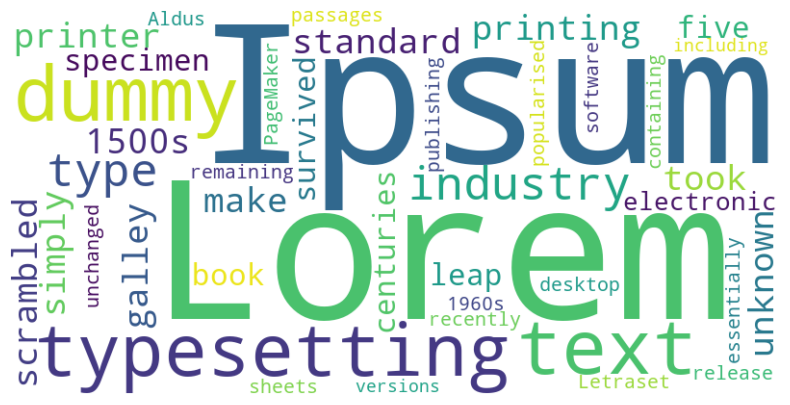

Word cloud image successfully saved to '/Users/maitripatel/Desktop/Codes/Python/Advanced_Python_Programming/Class-7/Data.png'.


In [16]:
try:
    input_file = input("Enter the input file path: ")
    output_file = input("Enter the output file path: ")
    wordcloud_image_path = "/Users/maitripatel/Desktop/Codes/Python/Advanced_Python_Programming/Class-7/Data.png"

    content = read_input_file(input_file)

    result = process_text(content)

    save_output(output_file, result)
    print(f"Processing complete! Results saved to {output_file}")

    generate_word_cloud(content, wordcloud_image_path)
    print(f"Word cloud image successfully saved to '{wordcloud_image_path}'.")

except FileNotFoundError as e:
    print(f"Error: {e}")

except InvalidInputDataError as e:
    print(f"Error: {e}")

except DiskSpaceFullError as e:
    print(f"Error: {e}")

except Exception as e:
    print(f"An unexpected error occurred: {e}")
